In [1]:
import pandas as pd



In [2]:
Interiors= pd.read_csv("data_pre/Interiors.csv")
Books = pd.read_csv("data_pre/Books.csv")
Appliances = pd.read_csv("data_pre/Appliances.csv")
Life_health = pd.read_csv("data_pre/Life_health.csv")
Sports = pd.read_csv("data_pre/Sports.csv")
Foods = pd.read_csv("data_pre/Foods.csv")
Convenience = pd.read_csv("data_pre/Convenience.csv")
Clothes = pd.read_csv("data_pre/Clothes.csv")
Accessories = pd.read_csv("data_pre/Accessories.csv")
Cosmetics = pd.read_csv("data_pre/Cosmetics.csv")
Parenting = pd.read_csv("data_pre/Parenting.csv")
Weather = pd.read_csv("data_pre/weather.csv")
All_data = pd.read_csv("data_pre/all_data.csv")

In [3]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 주단위로 묶어서 분석 

In [4]:
All_data_tmp = pd.read_csv('data_pre/all_data.csv',encoding='utf-8')

In [5]:
All_data_tmp.방송일자  = pd.to_datetime(All_data_tmp.방송일자)

In [7]:
tmp_all = All_data_tmp.groupby('방송일자').sum()

C:\Users\koreacamel\AppData\Local\Temp\ipykernel_15156\836423972.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp_all = All_data_tmp.groupby('방송일자').sum()


- 주 단위로 묶어준다. 

In [9]:
tmp_all

,상품수,판매량,매출액,상품평균가격(원),조회수,구매전환율(%)
방송일자,,,,,,
2022-01-01,603,7311.0,3.367746e+08,2901032.0,412250.0,104.864
2022-01-02,405,7188.0,1.799646e+08,3124909.0,197763.0,111.413
2022-01-03,58,5048.0,3.570707e+08,1618673.0,960269.0,58.030
2022-01-04,72,5003.0,2.982427e+07,539922.0,512041.0,101.594
2022-01-05,46,2404.0,8.196560e+07,1112926.0,999431.0,71.625
...,...,...,...,...,...,...
2022-11-18,2682,25726.0,9.037461e+08,28108223.0,3436505.0,1296.770
2022-11-19,1352,6034.0,3.387732e+08,6706377.0,570244.0,274.660
2022-11-20,1887,15069.0,8.217253e+08,18906311.0,1135233.0,387.149


In [10]:
weak = [g for n, g in tmp_all.groupby(pd.Grouper(freq='W'))]

In [17]:
# 데이터 프레임으로 만들기 위해서 데이터 각각 저장해준다. 
weak_list = [ ]
sum_list = [ ]
for w in weak[1:-1]: 
    tmp1 = str(w.index[0].date()) 
    weak_list.append(tmp1)

    tmp = w.sum()
    sum_list.append(tmp)

In [21]:
tmp_all_df = pd.DataFrame(sum_list, index=pd.to_datetime(weak_list))

In [22]:
tmp_all_df

,상품수,판매량,매출액,상품평균가격(원),조회수,구매전환율(%)
2022-01-03,2252.0,36037.0,1.460302e+09,20590086.0,5466479.0,777.148
2022-01-10,6742.0,130222.0,7.000964e+09,86644135.0,15349839.0,2785.970
2022-01-17,10193.0,200097.0,1.119579e+10,145081959.0,20417039.0,3637.738
2022-01-24,5984.0,133052.0,6.173535e+09,99851333.0,10896787.0,2485.844
2022-01-31,3871.0,82684.0,3.891810e+09,52839762.0,4877070.0,1127.311
2022-02-07,9724.0,223097.0,1.293636e+10,133158928.0,15879068.0,3372.251
2022-02-14,13514.0,196726.0,1.370155e+10,165611464.0,23076255.0,4773.954
2022-02-21,15159.0,264233.0,1.399165e+10,180617038.0,23491340.0,6226.157
2022-02-28,12697.0,193555.0,7.518872e+09,128796698.0,16630519.0,4741.997
2022-03-07,14608.0,208640.0,9.378745e+09,161865176.0,18538328.0,5108.001


In [23]:
tmp_all_df['매출액'] = tmp_all_df['매출액'].astype('int64') 

# Prophet 

In [39]:
 from fbprophet import Prophet

# 콘다 관리자 권한으로 설치 해야함 

c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
prop_all = tmp_all.reset_index()

In [30]:
prop_all

,방송일자,상품수,판매량,매출액,상품평균가격(원),조회수,구매전환율(%)
0,2022-01-01,603,7311.0,3.367746e+08,2901032.0,412250.0,104.864
1,2022-01-02,405,7188.0,1.799646e+08,3124909.0,197763.0,111.413
2,2022-01-03,58,5048.0,3.570707e+08,1618673.0,960269.0,58.030
3,2022-01-04,72,5003.0,2.982427e+07,539922.0,512041.0,101.594
4,2022-01-05,46,2404.0,8.196560e+07,1112926.0,999431.0,71.625
...,...,...,...,...,...,...,...
321,2022-11-18,2682,25726.0,9.037461e+08,28108223.0,3436505.0,1296.770
322,2022-11-19,1352,6034.0,3.387732e+08,6706377.0,570244.0,274.660
323,2022-11-20,1887,15069.0,8.217253e+08,18906311.0,1135233.0,387.149
324,2022-11-21,3476,35256.0,1.734463e+09,33635394.0,5453113.0,1477.799


In [36]:
prop_sell = prop_all[['방송일자', '매출액']]
prop_sell = prop_sell.rename(columns= {'방송일자' :'ds', '매출액' : 'y'})


In [38]:
prop_sell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      326 non-null    datetime64[ns]
 1   y       326 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.2 KB


In [51]:
holidays = pd.DataFrame({
'holiday': 'playoff',
'ds': pd.to_datetime(['2022-01-01', '2022-01-31', '2022-02-01',
                      '2022-02-02', '2022-05-05', '2022-05-08',
                      '2022-06-06', '2022-08-15', '2022-09-09',
                      '2022-09-10', '2022-09-11', '2022-09-12',
                      '2022-10-03', '2022-10-09', '2022-10-10',
                      '2022-12-25', '2023-01-01', '2023-01-21',
                      '2023-01-22', '2023-01-23', '2023-01-24',
                       '2023-03-01', '2023-05-05', '2023-05-27',
                        '2023-06-06', '2023-08-15', '2023-09-28',
                         '2023-09-29', '2023-09-30', '2023-10-03',
                          '2023-10-09']),
'lower_window': 0,
'upper_window': 1,
})

In [52]:
model_prop = Prophet(holidays = holidays,changepoint_range=0.9)
model_prop.fit(prop_sell)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [41]:
future = model_prop.make_future_dataframe(periods=365)
future.tail()

,ds
686,2023-11-18
687,2023-11-19
688,2023-11-20
689,2023-11-21
690,2023-11-22


In [53]:
forecast = model_prop.predict(future)
forecast.tail()

c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,playoff,playoff_lower,playoff_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
686,2023-11-18,2.289048e+09,2.208912e+08,1.935787e+09,2.134850e+09,2.436889e+09,-1.182099e+09,-1.182099e+09,-1.182099e+09,0.0,...,0.0,0.0,0.0,-1.182099e+09,-1.182099e+09,-1.182099e+09,0.0,0.0,0.0,1.106949e+09
687,2023-11-19,2.290259e+09,6.027496e+08,2.233183e+09,2.135589e+09,2.439021e+09,-8.745050e+08,-8.745050e+08,-8.745050e+08,0.0,...,0.0,0.0,0.0,-8.745050e+08,-8.745050e+08,-8.745050e+08,0.0,0.0,0.0,1.415754e+09
688,2023-11-20,2.291470e+09,2.134354e+09,3.854346e+09,2.136257e+09,2.440871e+09,7.014352e+08,7.014352e+08,7.014352e+08,0.0,...,0.0,0.0,0.0,7.014352e+08,7.014352e+08,7.014352e+08,0.0,0.0,0.0,2.992906e+09
689,2023-11-21,2.292681e+09,2.125213e+09,3.861881e+09,2.136812e+09,2.442509e+09,7.476148e+08,7.476148e+08,7.476148e+08,0.0,...,0.0,0.0,0.0,7.476148e+08,7.476148e+08,7.476148e+08,0.0,0.0,0.0,3.040296e+09
690,2023-11-22,2.293892e+09,1.987100e+09,3.647806e+09,2.137367e+09,2.444054e+09,5.253218e+08,5.253218e+08,5.253218e+08,0.0,...,0.0,0.0,0.0,5.253218e+08,5.253218e+08,5.253218e+08,0.0,0.0,0.0,2.819214e+09


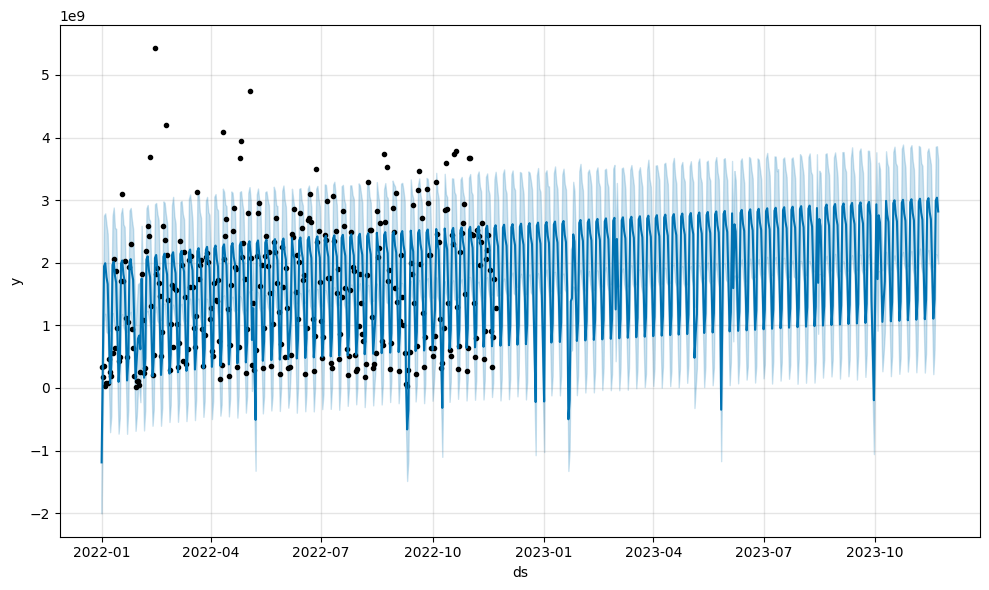

In [54]:
fig1 = model_prop.plot(forecast)

- forecast component 시각화(Trend, Weakly, Yearly)

c:\Users\koreacamel\anaconda3\envs\final\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


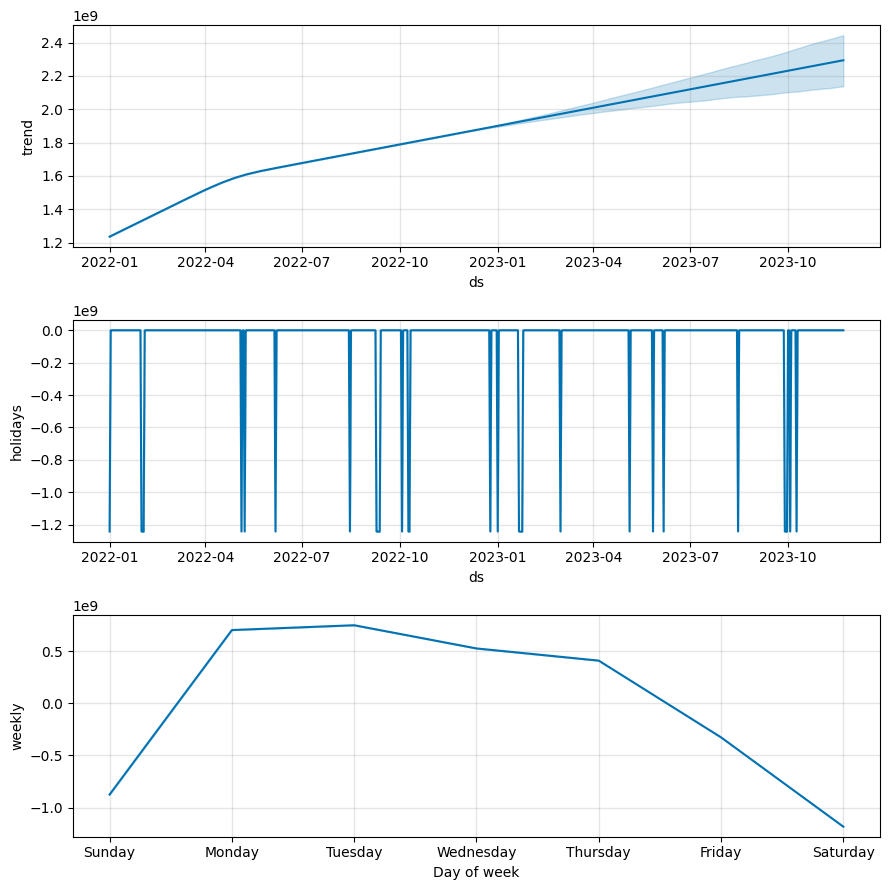

In [55]:
fig2 = model_prop.plot_components(forecast)

In [49]:
playoffs

,holiday,ds,lower_window,upper_window
0,playoff,2022-01-01,0,1
1,playoff,2022-01-31,0,1
2,playoff,2022-02-01,0,1
3,playoff,2022-02-02,0,1
4,playoff,2022-05-05,0,1
5,playoff,2022-05-08,0,1
6,playoff,2022-06-06,0,1
7,playoff,2022-08-15,0,1
8,playoff,2022-09-09,0,1
9,playoff,2022-09-10,0,1


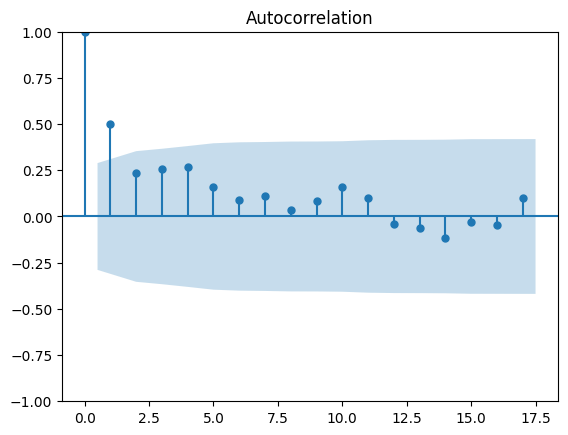

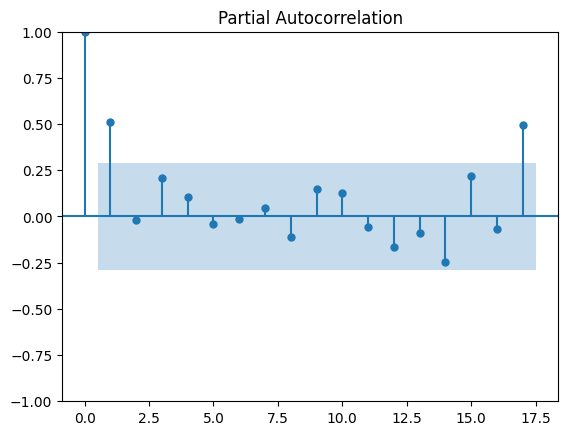

In [25]:
plot_acf(tmp_all_df['조회수'])
plot_pacf(tmp_all_df['조회수'])
plt.show()

In [31]:
import statsmodels.api as sm

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose


ts = tmp.매출액
result = seasonal_decompose(ts, model='additive')


plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()


ValueError: x must have 2 complete cycles requires 104 observations. x only has 46 observation(s)

In [61]:
from pmdarima.arima import ndiffs
import pmdarima as pm

In [180]:
model = pm.auto_arima(y = tmp        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14461.178, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14460.658, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14420.744, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14459.182, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14371.795, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14348.321, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14444.502, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14340.024, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14423.571, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14299.576, Time=0.50 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14325.690, Time=0.32 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14247.675, Time=0.76 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.62 sec

Best model:  ARIMA(3,1,3)(0,0,

In [151]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   46
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -1043.207
Date:                Mon, 12 Dec 2022   AIC                           2094.415
Time:                        01:31:49   BIC                           2101.641
Sample:                    01-03-2022   HQIC                          2097.109
                         - 11-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3825      0.184     -2.078      0.038      -0.743      -0.022
ar.L2         -0.4464      0.122     -3.653      0.000      -0.686      -0.207
ar.L3         -0.4328      0.186     -2.326      0.0

- Prob (Q) 값을 보면 0.65이므로 유의수준 0.05에서 귀무가설을 기각하지 못합니다. Ljung-Box (Q) 통계량의 귀무가설은 “잔차(residual)가 백색잡음(white noise) 시계열을 따른다”이므로, 위 결과를 통해 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기상관을 가지지 않는 백색 잡음임을 확인할 수 있습니다.

- Prob(JB)값을 보면 0.00으로 유의 수준 0.05에서 귀무가설을 기각합니다. Jarque-Bera (JB) 통계량의 귀무가설은 “잔차가 정규성을 만족한다”이므로, 위 결과를 통해 “잔차가 정규성을 따르지 않음”을 확인할 수 있습니다.

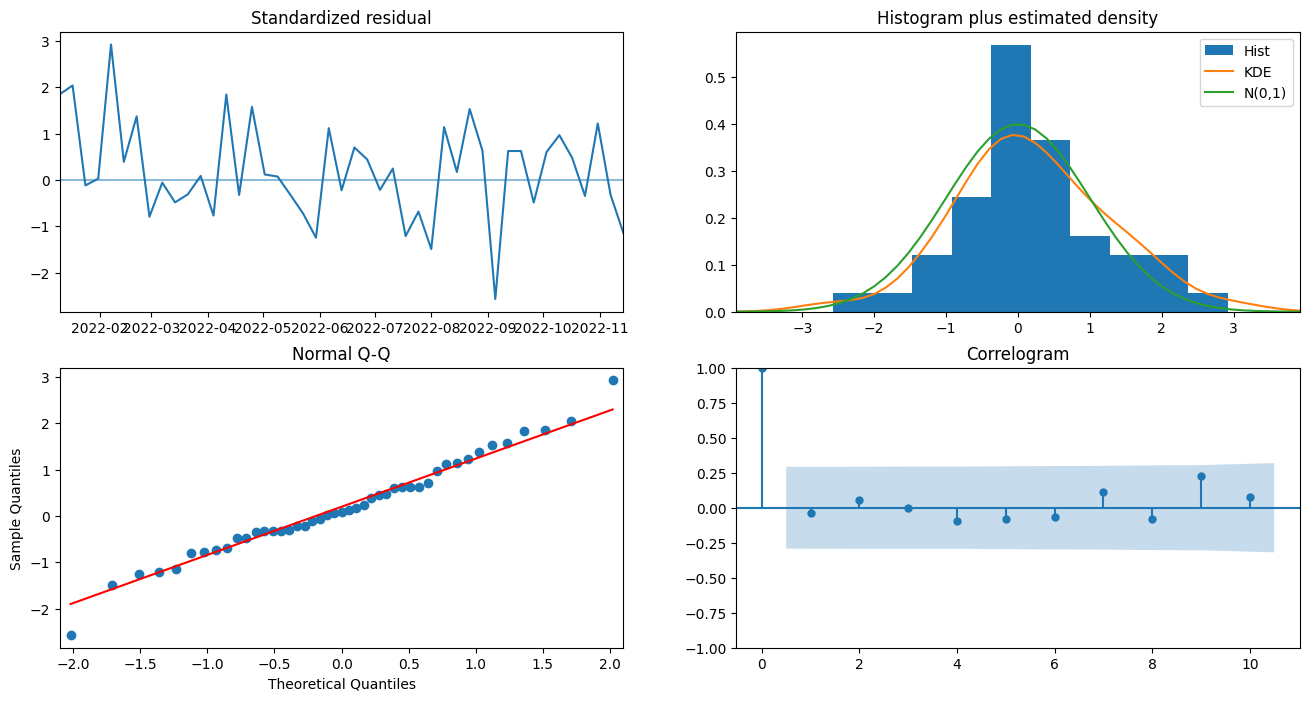

In [156]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

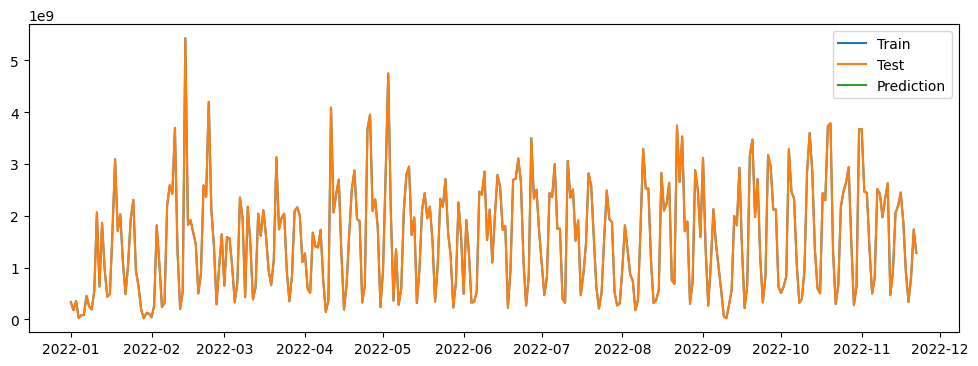

In [66]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(tmp)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [176]:
tmp.values

array([[3.36774600e+08],
       [1.79964570e+08],
       [3.57070730e+08],
       [2.98242700e+07],
       [8.19656000e+07],
       [8.57832700e+07],
       [4.55696760e+08],
       [2.55366650e+08],
       [1.94594420e+08],
       [5.51654040e+08],
       [2.06401901e+09],
       [6.33754270e+08],
       [1.86157000e+09],
       [9.61303480e+08],
       [4.38036500e+08],
       [4.90626370e+08],
       [1.70848740e+09],
       [3.09338770e+09],
       [1.70922624e+09],
       [2.02804376e+09],
       [1.11026026e+09],
       [4.87684920e+08],
       [1.05869656e+09],
       [1.93931582e+09],
       [2.30643356e+09],
       [9.42640080e+08],
       [6.44170240e+08],
       [1.98455160e+08],
       [2.34913100e+07],
       [1.19029020e+08],
       [1.16155240e+08],
       [4.39697200e+07],
       [2.60099680e+08],
       [1.81561837e+09],
       [1.09095233e+09],
       [2.44460590e+08],
       [3.20553800e+08],
       [2.19134963e+09],
       [2.58868503e+09],
       [2.42467627e+09],


In [179]:
order = (3, 1, 3)
model = sm.tsa.arima.ARIMA(tmp.values, order)
fit = model.fit(disp =0)


ValueError: endog and exog matrices are different sizes

In [30]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
#print(df)
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
#print(df)
print(df.info())
'''
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2001-11-01 to 2001-11-20
Data columns (total 1 columns):
count    20 non-null object
dtypes: object(1)
memory usage: 320.0+ bytes
None
'''

order = (2, 1, 2)
model = ARIMA(df, order, freq='D')
fit = model.fit()

print(fit.summary())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2001-11-01 to 2001-11-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
None


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
